<a href='http://www.algebra.hr'> <img src='../algebra_logo_color_h.png' alt="Algebra" width="500" /></a>
___
# Napredna primjena NumPy - Numerical Python

## Rad s datotekama

Većina je podataka pohranjena u datotekama tako da je za početak jako važno upoznati se s NumPy ugrađenom podrškom za rad s datotekama, odnosno čitanjem i pisanjem u datotekama. Radit ćemo isključivo s tekstualnim datotekama, dakle nećemo obrađivati fotografije, video datoteke i sl.

### Zapisivanje u tekstualnu datoteku

Za početak ćemo pohraniti naš niz (*Array*) u neku tekstualnu datoteku s ekstenzijom *.txt*.

In [1]:
import numpy as np

In [2]:
niz = np.arange(1, 65).reshape(8, 8)
niz

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40],
       [41, 42, 43, 44, 45, 46, 47, 48],
       [49, 50, 51, 52, 53, 54, 55, 56],
       [57, 58, 59, 60, 61, 62, 63, 64]])

In [12]:
import os

os.path.exists?

Signature: os.path.exists(path)
Docstring: Test whether a path exists.  Returns False for broken symbolic links
Type:      builtin_function_or_method

In [13]:
import os

folder_path = './numpy_files'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [14]:
# Pohrana u datoteku
# np.savetxt('./save_to_file/niz.txt', niz)
np.savetxt(f'{folder_path}/niz.txt', niz, fmt='%10.5f', delimiter=';', newline=';\n')

Ovo je jednostavno. Ako pogledamo sadržaj naše datoteke, vidjet ćemo da su brojevi zapisani u znanstvenom načinu zapisivanja brojeva. Na primjer: *3.300000000000000000e+01*. Ovo je broj preuzet iz *nix.txt* datoteke. Završetak *e+01* označava sve ono prije pomnoženo s deset na *+01* potenciju, odnosno pomnoženo s deset. Zato je *3.300000000000000000e+01* identično:

$$
3.3 x 10^1 = 33
$$

Upoznajmo se malo više s mogućnostima *np.savetxt()* metode. Najjednostavnije je pozvati Python u pomoć - *help()*.

In [5]:
np.savetxt?

Signature:      
np.savetxt(
    fname,
    X,
    fmt='%.18e',
    delimiter=' ',
    newline='\n',
    header='',
    footer='',
    comments='# ',
    encoding=None,
)
Call signature:  np.savetxt(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function savetxt at 0x0000012F760F42C0>
File:            c:\repos\py-jupyter-nb\venv\lib\site-packages\numpy\lib\npyio.py
Docstring:      
Save an array to a text file.

Parameters
----------
fname : filename or file handle
    If the filename ends in ``.gz``, the file is automatically saved in
    compressed gzip format.  `loadtxt` understands gzipped files
    transparently.
X : 1D or 2D array_like
    Data to be saved to a text file.
fmt : str or sequence of strs, optional
    A single format (%10.5f), a sequence of formats, or a
    multi-format string, e.g. 'Iteration %d -- %10.5f', in which
    case `delimiter` is ignored. For complex `X`, the legal options
    for `fmt` are:

    * a single specifier, `fmt='

Lista parametara je:
1. *fname* ili *file_name*, odnosno naziv datoteke.
2. *X* ili podaci koje želimo pohraniti u obliku 1D ili 2D niza.
3. *fmt* ili format zapisa. Recimo '%10.2f' bi značilo: pohrani brojeve u formatu decimalnom zapisu (onaj *f* na kraju označava float, a prije toga odredimo koliko decimalnih mjesta s onom dvojkom nakon broja deset).
4. *delimiter* označava koji simbol ćemo koristiti za razdvajanje kolona, odnosno brojeva unutar jednog reda. Predefinirano je razmak.
5. *newline* označava delimiter između redova. Predefinirano je znak prelaska u novi red '\n'
6. *header*, *footer* i *comments* su pomoćni podaci koji mogu dodatno *uljepšati* zapis u našoj datoteci.

**VJEŽBA<br>
Iskoristite navedeno te u datoteku *tablica_mnozenja.txt* zapišite tablicu množenja od 1 do 10, dodajte zaglavlje u kojem će pisati slijedeći tekst:<br>
Naziv datoteke: "tablica_mnozenja.txt"<br>
Autor: "ime i prezime"<br>
..........................................
<br>
Nakon toga treba zapisati tablicu množenja i nakon tablice množenja treba zapisati<br>
..........................................<br>
"datum i vrijeme zapisa"**

**NAPOMENA: Umjesto ime i prezime upišite Vaše ime i prezime, umjesto datum i vrijeme zapisa generirajte podatak o datumu i vremenu pomoću Python modula za rad s datumima i vremenom.**

In [27]:
from datetime import datetime as dt

header = f'''
Naziv datoteke:\t"tablica_mnozenja.txt"
Autor:\t\t\t"Pero Peric"
{"*"*110}
'''

footer = f'''
{"*"*110}
Datum:\t\t{dt.now().strftime("%d.%m.%Y %H:%M")}
'''

# tablica_mnozenja = np.arange(1, 101).reshape(10, 10)
tablica_mnozenja = np.fromfunction((lambda x, y: x * y), (10 + 1, 10 + 1), dtype=np.int32)
tablica_mnozenja = tablica_mnozenja[ 1 : , 1 : ].copy()
tablica_mnozenja

folder_path = './numpy_files'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

np.savetxt(f'{folder_path}/tablica_mnozenja.txt', tablica_mnozenja, fmt='%10.2f', delimiter=';', header=header, footer=footer)

### Čitanje iz tekstualnih datoteka

Čitanje iz tekstualnih datoteka je malo kompleksnije, odnosno nudi više mogućnosti. To je i razumljivo, zato jer možemo čitati iz datoteka koje su kreirali naši kolege ili neki drugi znanstvenici, firme ili programi koje ne netko drugi programirao.

Ako smo za pisanje u datoteku koristili *np.savetxt()* metodu, onda bismo za učitavanje podataka iz datoteke koristili *np.loadtxt()* metodu. Prije nego na primjeru pokažemo kako se koristi metoda, ovaj put ćemo se odmah obratiti Pythonu za pomoć i zatražiti pomoć u vezi *np.loadtxt* metode.

In [28]:
np.loadtxt?

Signature:
np.loadtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    converters=None,
    skiprows=0,
    usecols=None,
    unpack=False,
    ndmin=0,
    encoding='bytes',
    max_rows=None,
    *,
    quotechar=None,
    like=None,
)
Docstring:
Load data from a text file.

Parameters
----------
fname : file, str, pathlib.Path, list of str, generator
    File, filename, list, or generator to read.  If the filename
    extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
    that generators must return bytes or strings. The strings
    in a list or produced by a generator are treated as lines.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or

Lista argumenata za *loadtxt* metodu je:
1. *fname* - opet na prvom mjestu naziv datoteke
2. *dtype* - predefinirani tip podataka je float. Očekivano, ali ovdje možemo iskoristiti priliku i definirati neki drugi, kao recimo cijeli broj ili možda datum (zapisan kao cijeli broj u *Unix time* formatu).
3. *comments* - komentari
4. *delimiter* - ovaj argument ćemo koristiti jako često jer nam je većina podataka zapisana u CSV formatu, odnosno kolone su razdvojene zarezom ili točka zarezom.
5. *converters* - predstvlja *Python dict* objekt u kojem je kao ključ definirana kolona, a kao vrijednost (najčešće) *lambda* funkcija koja učitani podatak konvertira u neki nama potrebni tip ili oblik podatka. Koristit ćemo za konverziju datuma
6. *skiprows* - definira koliko redaka želimo preskočiti. U našem primjeru s tablicom množenja, to bi bila tri reda koja želimo preskočiti
7. *usecols* - predstavlja *tuple* s indeksima kolona (0 predstavlja prvu kolonu) koje želimo učitati. Recimo (3,4,6,9) učitat će četvrtu, petu, sedmu i desetu kolonu.
8. *unpack* - ako je *True*, onda će učitane podatke *zarotirati*. To nam omogućuje da *raspakiramo* učitane podatka, odnosno pohranimo ih u više varijabli
9. *ndim* - definira u koliko dimenzija želimo presložiti naše podatke. Predefinirana vrijednost je 0, a maksimalna je 2
10. *max_rows* - definira broj redaka koje želimo učitati nakon što smo prethodno definirali broj redaka koje želimo preskočiti pomoću argumenta *skiprows*. Obratite pažnju da ovaj parametar ima podvlaku u nazivu, a *skiprows* nema.

Iskoristimo i pokažimo kako se koriste ove mogućnosti na nekoliko primjera.

Prvo ćemo učitati cijelu *csv* datoteku

In [29]:
e_cars_podaci = np.loadtxt('../Data/Vjezbe_Primjeri/e-cars.csv', delimiter=',')
e_cars_podaci

ValueError: could not convert string 'YEAR;Make;Model;Size;(kW);Unnamed: 5;TYPE;CITY (kWh/100 km);HWY (kWh/100 km);COMB (kWh/100 km);CITY to float64 at row 0, column 1.

Očigledno nećemo uspjeti tako lako učitati podatke kao pomoću Pandas biblioteke. Ovdje se radi o podacima koje treba konvertirati u neke *čitljivije* formate biblioteci NumPy. Za početak bi bilo dobro vidjeti kako naši podaci izgledaju. Potražimo pomoć od naše Pandas biblioteke.

In [38]:
import pandas as pd

e_cars_df = pd.read_csv('../Data/Vjezbe_Primjeri/e-cars.csv', delimiter=';')
e_cars_df

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
5,2013,SMART,FORTWO ELECTRIC DRIVE CABRIOLET,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,NaN,109,8
6,2013,SMART,FORTWO ELECTRIC DRIVE COUPE,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,NaN,109,8
7,2013,TESLA,MODEL S (40 kWh battery),FULL-SIZE,270,A1,B,22.4,21.9,22.2,2.5,2.5,2.5,0,NaN,224,6
8,2013,TESLA,MODEL S (60 kWh battery),FULL-SIZE,270,A1,B,22.2,21.7,21.9,2.5,2.4,2.5,0,NaN,335,10
9,2013,TESLA,MODEL S (85 kWh battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,NaN,426,12


Provjerimo i koji je tip podataka u našim kolonama. Taj podatak može biti jako koristan.

In [33]:
e_cars_df.dtypes

YEAR                   int64
Make                  object
Model                 object
Size                  object
(kW)                   int64
Unnamed: 5            object
TYPE                  object
CITY (kWh/100 km)    float64
HWY (kWh/100 km)     float64
COMB (kWh/100 km)    float64
CITY (Le/100 km)     float64
HWY (Le/100 km)      float64
COMB (Le/100 km)     float64
(g/km)                 int64
RATING               float64
(km)                   int64
TIME (h)               int64
dtype: object

In [36]:
e_cars_df.isnull().sum()

YEAR                  0
Make                  0
Model                 0
Size                  0
(kW)                  0
Unnamed: 5            0
TYPE                  0
CITY (kWh/100 km)     0
HWY (kWh/100 km)      0
COMB (kWh/100 km)     0
CITY (Le/100 km)      0
HWY (Le/100 km)       0
COMB (Le/100 km)      0
(g/km)                0
RATING               34
(km)                  0
TIME (h)              0
dtype: int64

Vidimo da prvi redak ima nazive kolona pa bismo taj red trebali preskočiti. Za početak ćemo učitati kolone koje imaju *float64* tip podatka.

Jedan od boljih načina kako steći neku vještinu vježba, a to ćemo dobiti pokušajima i popravljanjem pogrešaka.

In [41]:
e_cars_podaci = np.loadtxt('../Data/Vjezbe_Primjeri/e-cars.csv', 
                           delimiter=';', 
                           skiprows=1, 
                           usecols=[0, 4, 7, 8, 9, 10, 11, 12, 13, 15, 16]).astype(np.int64)
e_cars_podaci

array([[2012,   49,   16,   21,   18,    1,    2,    2,    0,  100,    7],
       [2012,   80,   19,   23,   21,    2,    2,    2,    0,  117,    7],
       [2013,  107,   19,   21,   20,    2,    2,    2,    0,  122,    4],
       [2013,   49,   16,   21,   18,    1,    2,    2,    0,  100,    7],
       [2013,   80,   19,   23,   21,    2,    2,    2,    0,  117,    7],
       [2013,   35,   17,   22,   19,    1,    2,    2,    0,  109,    8],
       [2013,   35,   17,   22,   19,    1,    2,    2,    0,  109,    8],
       [2013,  270,   22,   21,   22,    2,    2,    2,    0,  224,    6],
       [2013,  270,   22,   21,   21,    2,    2,    2,    0,  335,   10],
       [2013,  270,   23,   23,   23,    2,    2,    2,    0,  426,   12],
       [2013,  310,   23,   23,   23,    2,    2,    2,    0,  426,   12],
       [2014,  104,   16,   19,   17,    1,    2,    2,    0,  131,    7],
       [2014,  107,   19,   21,   20,    2,    2,    2,    0,  122,    4],
       [2014,   49,   16,

Probajmo ograničiti učitane podatke na samo prvih 15 redaka i uzet ćemo samo kolone koje označavaju potrošnju u kWh/km. Dakle, kolone koje imaju indekse 7, 8 i 9.

In [42]:
e_cars_podaci = np.loadtxt('../Data/Vjezbe_Primjeri/e-cars.csv', 
                           delimiter=';', 
                           skiprows=1, 
                           usecols=[0, 4, 7, 8, 9, 10, 11, 12, 13, 15, 16],
                          max_rows=15).astype(np.int64)
e_cars_podaci

array([[2012,   49,   16,   21,   18,    1,    2,    2,    0,  100,    7],
       [2012,   80,   19,   23,   21,    2,    2,    2,    0,  117,    7],
       [2013,  107,   19,   21,   20,    2,    2,    2,    0,  122,    4],
       [2013,   49,   16,   21,   18,    1,    2,    2,    0,  100,    7],
       [2013,   80,   19,   23,   21,    2,    2,    2,    0,  117,    7],
       [2013,   35,   17,   22,   19,    1,    2,    2,    0,  109,    8],
       [2013,   35,   17,   22,   19,    1,    2,    2,    0,  109,    8],
       [2013,  270,   22,   21,   22,    2,    2,    2,    0,  224,    6],
       [2013,  270,   22,   21,   21,    2,    2,    2,    0,  335,   10],
       [2013,  270,   23,   23,   23,    2,    2,    2,    0,  426,   12],
       [2013,  310,   23,   23,   23,    2,    2,    2,    0,  426,   12],
       [2014,  104,   16,   19,   17,    1,    2,    2,    0,  131,    7],
       [2014,  107,   19,   21,   20,    2,    2,    2,    0,  122,    4],
       [2014,   49,   16,

Ok. Probajmo učitati kolonu koja ima *int64* tip podatka. Recimo kolonu koja u kojoj su vrijednosti snage za svaki automobil izražene u kW. To je kolona s indeksom 4. Osim toga pretvorimo je u cijele brojeve, jer nemamo vrijednosti nakon decimalnog zareza.

In [47]:
e_cars_kw = np.loadtxt('../Data/Vjezbe_Primjeri/e-cars.csv', 
                           delimiter=';', 
                           skiprows=1, 
                           usecols=4).astype(np.int64)
e_cars_kw

array([ 49,  80, 107,  49,  80,  35,  35, 270, 270, 270, 310, 104, 107,
        49,  80,  35,  35, 225, 270, 310, 125, 104, 107,  81,  49,  80,
        35,  35, 283, 283, 283, 280, 280, 515, 125, 104, 107,  81,  49,
        80,  80,  35,  35, 283, 283, 283, 386, 386, 386, 568, 568, 386,
       568], dtype=int64)

Sada možemo nešto napraviti s tim podacima. Recimo pronaći prosječnu snagu te najveću ili najmanju snagu i u kojem redu se nalazi ta vrijednost (odnosno za koji auto su vezane maksimalna i minimalna snaga).

In [55]:
print(f'Prosjecna snaga: {round(np.mean(e_cars_kw), 2)} kW ({round((np.mean(e_cars_kw) * 1.341), 2)} KS).')
print(f'Median snage: {round(np.median(e_cars_kw), 2)} kW ({round((np.median(e_cars_kw) * 1.341), 2)} KS).')
print(f'Maksimalna snaga: {round(np.max(e_cars_kw), 2)} kW ({round((np.max(e_cars_kw) * 1.341), 2)} KS).')
print(f'Minimalna snaga: {round(np.min(e_cars_kw), 2)} kW ({round((np.min(e_cars_kw) * 1.341), 2)} KS).')

Prosjecna snaga: 190.62 kW (255.62 KS).
Median snage: 107.0 kW (143.49 KS).
Maksimalna snaga: 568 kW (761.69 KS).
Minimalna snaga: 35 kW (46.94 KS).


## NumPy u društvu Pandas i Matplotlib biblioteka

Za obradu podataka u podatkovnoj znanosti, gotovo u velikoj večini slučajeva ćemo koristiti sve tri biblioteke koje smo do sada upoznali. NumPy biblioteka je temeljna biblioteka. Na osnovu nje su razvijene preostale dvije (ali i još neke druge koje nisu tema ovog seminara). Za nastavak naprednog korištenja NumPy biblioteke, koristit ćemo i preostale dvije biblioteke. Pandas ćemo koristiti za učitavanje podataka iz csv datoteka te za izdvajanje kolona u *Serije* koje ćemo onda koristiti unutar NumPy biblioteke za neke proračune, dok ćemo Matplotlib biblioteku koristiti za vizualizaciju podataka. 

Većinu funkcija koje smo koristili prilikom učitavanja podataka u Pandas biblioteci se baziraju na NumPy mogućnostima. To je zato jer je NumPy temeljna biblioteka na kojoj je razvijen Pandas.

Najbolje bi bilo da napravimo jedan manji projektni zadatak u kojem ćemo koristiti sve do sada naučeno (uz još neku novu informaciju) te tako prođemo kroz mogućnosti ove tri biblioteke.

### VJEŽBA - Utjecaj udaljenosti od mora na temperaturu u gradu

Kada je ljeto svi žele ići na more. Na moru je pravo ljeto. Sasvim je prirodno da je na moru vruće i da su tamo temperature visoke. Idemo istražiti koliko zaista udaljenost od mora ima utjecaja na temperature. Znamo da je Slavonija jako vruća ljeti, a jako je udaljena od mora. To bi nam moglo dati krivu sliku pa bismo se mogli ograničiti samo na Istru. Istra je *na moru*, ali ima i dio koji je u unutrašnjosti pa se čini jako dobra regija za ovaj zadatak.

**Podaci, način prikupljanja podataka, izvori ...**<br>
Odredit ćemo nekoliko gradova u Hrvatskoj i za njih ćemo uzeti podatke o temperaturama unutar zadnjih pet dana. Za svaki od ovih gradova ćemo odrediti koliko su udaljeni od mora (također ćemo pronaći podatak na Internetu). Analizirat ćemo prikupljene podatke i donijeti neke zaključke.

**NAPOMENA: Za kvalitetnu analizu trebala bi nam velika količina podataka i trebali bismo svakodnevno mjeriti temperature za svaki od ciljanih gradova tijekom nekoliko godina. Za to nemamo vremena tijekom ovog tečaja, ali ako ste zainteresirani za provedbu jednog ovakvog projekta, slobodno iskoristite ovaj zadatak kao predložak i krenite.**

#### Odredimo listu gradova i njihovu udaljenost od mora

Ograničimo se na 10 gradova u Istri.
1. Pula
2. Pazin
3. Motovun
4. Labin
5. Buzet
6. Buje
7. Višnjan
8. Kanfanar
9. Žminj
10. Vodnjan

Udaljenost od mora je nešto što trebamo izračunati i nekako se snaći. Jedan od primjera je mjerenje udaljenosti do nekog grada koji je na moru. Ovo nije najtočnija mjera, ali kako ne radimo znanstveno istraživanje, bit će dovoljno dobro. Osim toga pokazat će nam kako dolazimo do nekih informacija. Vjerujem da će neki od studenata imati možda još bolju ideju od ove. Recimo za Vodnjan je dovoljno dobra udaljenost do Fažane.

**Odredimo udaljenosti od mora za gradove pomoću Google Maps usluge**
1. Pula - 0 km
2. Pazin - Poreč - 30 km
3. Motovun - Novigrad - 25 km
4. Labin - Rabac - 4 km
5. Buzet - Novigrad - 40 km
6. Buje - Lovrečica - 12 km
7. Višnjan - Červar-porat - 10 km
8. Kanfanar - Rovinj - 17 km
9. Žminj - Rovinj - 23 km
10. Vodnjan - Fažana - 7 km

**Odredimo zemljopisne koordinate za gradove pomoću https://latitude.to/ usluge**
1. Pula - 0 km - 44.86833 13.84806
2. Pazin -> Poreč - 30 km - 45.23878 13.93497
3. Motovun -> Novigrad - 25 km - 45.33673 13.82821
4. Labin -> Rabac - 4 km - 45.09485 14.12319
5. Buzet -> Novigrad - 40 km - 45.40788 13.96559
6. Buje -> Lovrečica - 12 km - 45.40837 13.65914
7. Višnjan -> Červar-porat - 10 km - 45.27602 13.71887
8. Kanfanar -> Rovinj - 17 km - 45.12284 13.83850
9. Žminj -> Rovinj - 23 km - 45.14391 13.90868
10. Vodnjan -> Fažana - 7 km - 44.95896 13.85134

#### Prikupimo podatke o vremenu za svaki od navedenih gradova

Usluga *OpenWeatherMap* nudi prikupljanje podataka o vremenu za neki grad tijekom zadnjih pet dana. Da bismo to napravili moramo se registrirati na stranici: https://openweathermap.org/. Registracija je besplatna. Ako ipak želite podatke tijekom zadnjih 40 godina, onda te podatke možete kupiti. Mi ćemo za potrebe ove vježbe koristiti besplatnu verziju.

Nakon što se registrirate pomoću uputa na ovoj stranici https://openweathermap.org/api/one-call-api#history možete kreirati API upit pomoću kojeg ćete dobiti json datoteku. Kao datum trebamo koristiti UNIX time, a za to će nam koristiti https://time.is/Unix_time_converter ova Internet usluga.

API upit za grad Pulu će izgledati ovako:
http://api.openweathermap.org/data/2.5/onecall/timemachine?lat=44.86833&lon=13.84806&dt=1633556632&appid=a38edf57331518ae5f14c42cff1ba255

VAŽNO Usluga OpenWeather Map NEMA jedan upit za zadnjih pet dana, nego je potrebno za svaki dan generirati novi upit.

Pripremimo globalne varijable koje ćemo koristiti tijekom automatizacije prikupljanja podataka.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from datetime import datetime as dt
import json
import requests


unix_dates = [1715274000, 
              1715360400, 
              1715446800, 
              1715533200, 
              1715619600, 
              1715706000]

cities = {
    'Pula': [0, 44.86833, 13.84806],
    'Pazin': [30, 45.23878, 13.93497],
    'Motovun': [25, 45.33673, 13.82821],
    'Labin': [4, 45.09485, 14.12319],
    'Buzet': [40, 45.40788, 13.96559],
    'Buje': [12, 45.40837, 13.65914],
    'Višnjan': [10, 45.27602, 13.71887],
    'Kanfanar': [17, 45.12284, 13.83850],
    'Žminj': [23, 45.14391, 13.90868],
    'Vodnjan': [7, 44.95896, 13.85134]
}

api_key = 'a38edf57331518ae5f14c42cff1ba255'
weather_url = f'http://api.openweathermap.org/data/2.5/onecall/timemachine?lat={cities['Pula'][1]}&lon={cities['Pula'][2]}&dt={unix_dates[0]}&appid={api_key}'

Provjerimo je li API upit za grad Pulu radi kako smo očekivali.

In [63]:
pula = json.loads(requests.get(weather_url).text)
pula

{'lat': 44.8683,
 'lon': 13.8481,
 'timezone': 'Europe/Zagreb',
 'timezone_offset': 7200,
 'current': {'dt': 1715274000,
  'sunrise': 1715226172,
  'sunset': 1715278755,
  'temp': 292.46,
  'feels_like': 291.8,
  'pressure': 1017,
  'humidity': 52,
  'dew_point': 282.37,
  'uvi': 0.28,
  'clouds': 0,
  'visibility': 10000,
  'wind_speed': 4.63,
  'wind_deg': 50,
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}]},
 'hourly': [{'dt': 1715212800,
   'temp': 289.41,
   'feels_like': 289.02,
   'pressure': 1017,
   'humidity': 74,
   'dew_point': 284.77,
   'uvi': 0,
   'clouds': 100,
   'visibility': 10000,
   'wind_speed': 9.33,
   'wind_deg': 55,
   'wind_gust': 14.91,
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04n'}]},
  {'dt': 1715216400,
   'temp': 289.29,
   'feels_like': 288.84,
   'pressure': 1017,
   'humidity': 72,
   'dew_point': 284.25,
   'uvi': 0,
   'clouds': 100,
   

Popis ključeva unutar *json* datoteke možemo dobiti na slijedeći način:

In [64]:
pula.keys()

dict_keys(['lat', 'lon', 'timezone', 'timezone_offset', 'current', 'hourly'])

Nas zanima samo ključ: 
- 'hourly' - lista *dict* objekata s podacima o vremenu tijekom 24 sata za određeni datum

In [66]:
pula['hourly'] # lista rjecnika s podacima mjerenja

[{'dt': 1715212800,
  'temp': 289.41,
  'feels_like': 289.02,
  'pressure': 1017,
  'humidity': 74,
  'dew_point': 284.77,
  'uvi': 0,
  'clouds': 100,
  'visibility': 10000,
  'wind_speed': 9.33,
  'wind_deg': 55,
  'wind_gust': 14.91,
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}]},
 {'dt': 1715216400,
  'temp': 289.29,
  'feels_like': 288.84,
  'pressure': 1017,
  'humidity': 72,
  'dew_point': 284.25,
  'uvi': 0,
  'clouds': 100,
  'visibility': 10000,
  'wind_speed': 9.49,
  'wind_deg': 54,
  'wind_gust': 15.32,
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}]},
 {'dt': 1715220000,
  'temp': 289.29,
  'feels_like': 288.81,
  'pressure': 1017,
  'humidity': 71,
  'dew_point': 284.03,
  'uvi': 0,
  'clouds': 100,
  'visibility': 10000,
  'wind_speed': 9.24,
  'wind_deg': 55,
  'wind_gust': 14.93,
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overc

Uzet ćemo slijedeće podatke:
- *temp* - temperatura koju trebamo konvertirati iz Kelvina u Celzijuse
- *humidity* - postotak vlažnosti
- *pressure* - tlak zraka
- *description* - ppis kakvo je vrijeme: clear sky
- *dt* - *date time* koje ćemo konvertirati u *čitljiv* oblik iz UNIX vremena
- *wind_speed* - brzina vjetra
- *wind_deg* - smjer vjetra

Za to ćemo pripremiti jednu funkciju koja će nam pomoći da za svaki grad filtriramo željene podatke

In [70]:
def filter_city_weather_data_per_hour(hourly_data, city_name, city_dist):
    return [round((hourly_data['temp'] - 273.15), 2),
            hourly_data['pressure'],
            hourly_data['humidity'],  
            hourly_data['dt'],
            hourly_data['wind_speed'],
            hourly_data['wind_deg'],
            hourly_data['weather'][0]['description'],
            city_name,
            dt.strftime(dt.fromtimestamp(hourly_data['dt']), '%Y-%m-%d %H:%M:%S'),
            city_dist]

Sada možemo automatizirati naše prikupljanje podataka.

1. Proći ćemo kroz rječnik gradova i uzeti jedan grad
2. Za taj grad ćemo proći kroz svaki od dana i dohvatiti temperature za taj dan
3. Unutar json rezultata ćemo proći kroz svaki sati i pročitati temperature te ćemo ih pohraniti u listu pomoću funkcije
4. Tako dobivene podatke ćemo pohraniti u jednu listu
5. Zatim ćemo to pohraniti u zasebnu datoteku za svaki od gradova

In [74]:
for city_name, values in cities.items():
    city_data_set = []
    for day in unix_dates:
        city_result = json.loads(requests.get(f'http://api.openweathermap.org/data/2.5/onecall/timemachine?lat={values[1]}&lon={values[2]}&dt={day}&appid={api_key}').text)

        for i in range(len(city_result['hourly'])):
            temp_data_set = filter_city_weather_data_per_hour(city_result['hourly'][i], city_name, values[0])
            city_data_set.append(temp_data_set)

    headings = ['temp', 'pressure', 'humidity', 'unix_dt', 'wind_speed', 'wind_deg', 'description', 'city_name', 'date_time', 'distance_to_see']
    city_data_frame = pd.DataFrame(city_data_set, columns=headings)

    city_data_frame.to_csv(f'./vjezba_datoteke/df_{city_name}.csv', mode='w')


#### ANALIZA PODATAKA

Napokon možemo krenuti na analizu podataka. Prvo ćemo učitati *DataFrame* za svaki grad iz njegove *csv* datoteke

In [76]:
pula_df = pd.read_csv('./vjezba_datoteke/df_Pula.csv')
pazin_df = pd.read_csv('./vjezba_datoteke/df_Pazin.csv')
motovun_df = pd.read_csv('./vjezba_datoteke/df_Motovun.csv')
labin_df = pd.read_csv('./vjezba_datoteke/df_labin.csv')
buzet_df = pd.read_csv('./vjezba_datoteke/df_Buzet.csv')
buje_df = pd.read_csv('./vjezba_datoteke/df_Buje.csv')
visnjan_df = pd.read_csv('./vjezba_datoteke/df_Višnjan.csv')
kanfanar_df = pd.read_csv('./vjezba_datoteke/df_Kanfanar.csv')
zminj_df = pd.read_csv('./vjezba_datoteke/df_Žminj.csv')
vodnjan_df = pd.read_csv('./vjezba_datoteke/df_Vodnjan.csv')

In [79]:
pula_df

,Unnamed: 0,temp,pressure,humidity,unix_dt,wind_speed,wind_deg,description,city_name,date_time,distance_to_see
0,0,16.26,1017,74,1715212800,9.33,55,overcast clouds,Pula,2024-05-09 02:00:00,0
1,1,16.14,1017,72,1715216400,9.49,54,overcast clouds,Pula,2024-05-09 03:00:00,0
2,2,16.14,1017,71,1715220000,9.24,55,overcast clouds,Pula,2024-05-09 04:00:00,0
3,3,16.14,1017,70,1715223600,9.03,56,overcast clouds,Pula,2024-05-09 05:00:00,0
4,4,16.14,1017,70,1715227200,10.21,60,overcast clouds,Pula,2024-05-09 06:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...
134,134,21.31,1011,64,1715695200,4.12,90,clear sky,Pula,2024-05-14 16:00:00,0
135,135,21.31,1011,60,1715698800,4.12,100,clear sky,Pula,2024-05-14 17:00:00,0
136,136,21.31,1011,56,1715702400,5.14,80,clear sky,Pula,2024-05-14 18:00:00,0
137,137,20.31,1011,60,1715706000,4.12,80,clear sky,Pula,2024-05-14 19:00:00,0


Prvo ćemo grafički prikazati podatke za temperaturu za grad Pulu.

In [78]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100

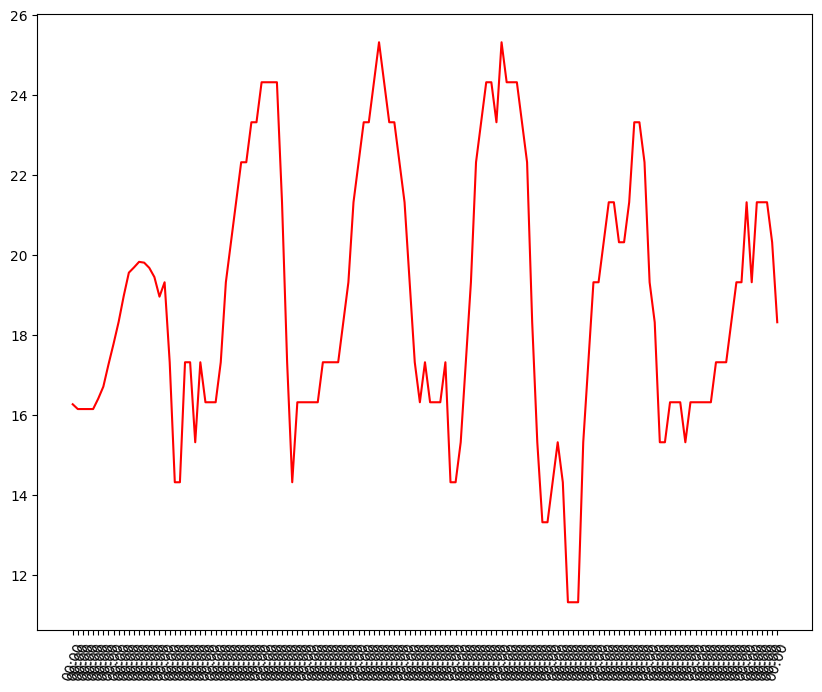

In [84]:
y1 = pula_df['temp']
x1 = pula_df['date_time']
fig, ax = plt.subplots()

plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
ax.plot(x1, y1, 'r')

**NAPOMENA Za sada ćemo zanemarit gustoću prikaza sati (*hours*)**

Dodajmo još nekoliko gradova u prikaz

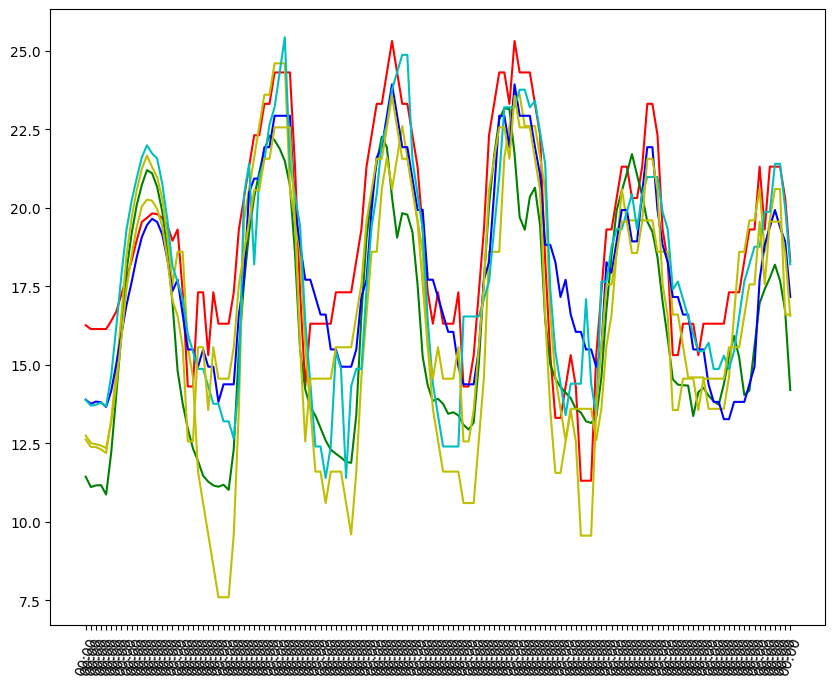

In [87]:
y1 = pula_df['temp']
x1 = pula_df['date_time']
y2 = pazin_df['temp']
x2 = pazin_df['date_time']
y3 = motovun_df['temp']
x3 = motovun_df['date_time']
y4 = labin_df['temp']
x4 = labin_df['date_time']
y5 = buzet_df['temp']
x5 = buzet_df['date_time']
y6 = kanfanar_df['temp']
x6 = kanfanar_df['date_time']


fig, ax = plt.subplots()

plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1, y1, 'r', x2, y2, 'g', x3, y3, 'y')
plt.plot(x4, y4, 'b', x5, y5, 'c', x6, y6, 'y')

Za sada ne vidimo neke velike razlike. Ali ako usporedimo maksimalne i minimalne temperature za svaki grad s njihovom udaljenošću od mora, možda dobijemo kakav koristan podatak.

In [88]:
dist = [
    pula_df['distance_to_see'],
    pazin_df['distance_to_see'],
    motovun_df['distance_to_see'],
    labin_df['distance_to_see'],
    buzet_df['distance_to_see'],
    buje_df['distance_to_see'],
    visnjan_df['distance_to_see'],
    kanfanar_df['distance_to_see'],
    zminj_df['distance_to_see'],
    vodnjan_df['distance_to_see']
]

temp_max = [
    pula_df['temp'].max(),
    pazin_df['temp'].max(),
    motovun_df['temp'].max(),
    labin_df['temp'].max(),
    buzet_df['temp'].max(),
    buje_df['temp'].max(),
    visnjan_df['temp'].max(),
    kanfanar_df['temp'].max(),
    zminj_df['temp'].max(),
    vodnjan_df['temp'].max()
]

temp_min = [
    pula_df['temp'].min(),
    pazin_df['temp'].min(),
    motovun_df['temp'].min(),
    labin_df['temp'].min(),
    buzet_df['temp'].min(),
    buje_df['temp'].min(),
    visnjan_df['temp'].min(),
    kanfanar_df['temp'].min(),
    zminj_df['temp'].min(),
    vodnjan_df['temp'].min()
]

Prvo prikažimo maksimalne temperature

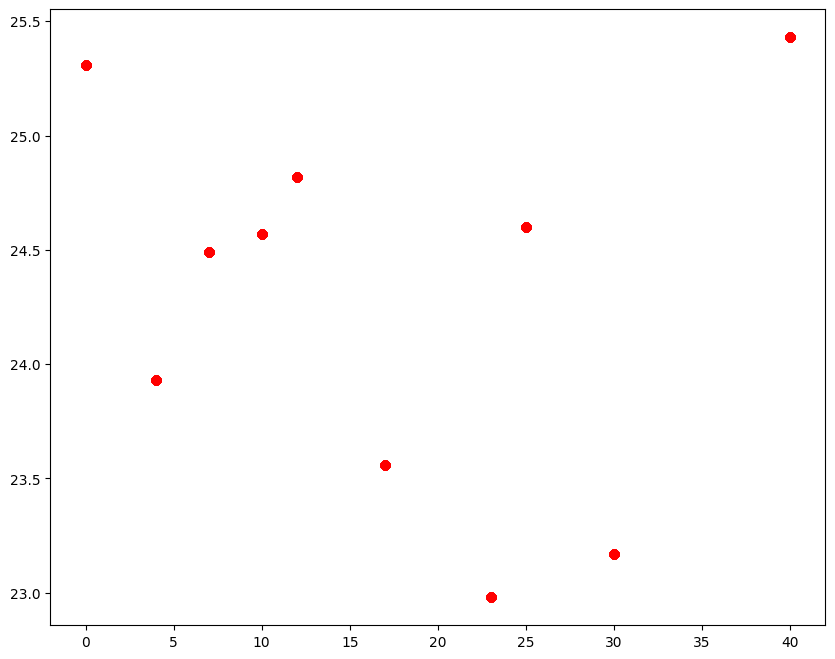

In [89]:
plt.plot(dist, temp_max, 'ro')

Iz prikazanog se ne vidi neki veliki utjecaj udaljenosti od mora na maksimalnu temperaturu. Možda i očekivano, jer kada je u Hrvatskoj vruće, onda je vruće svugdje.

Idemo prikazati minimalne temperature. Možda tu dobijemo neke korisne informacije.

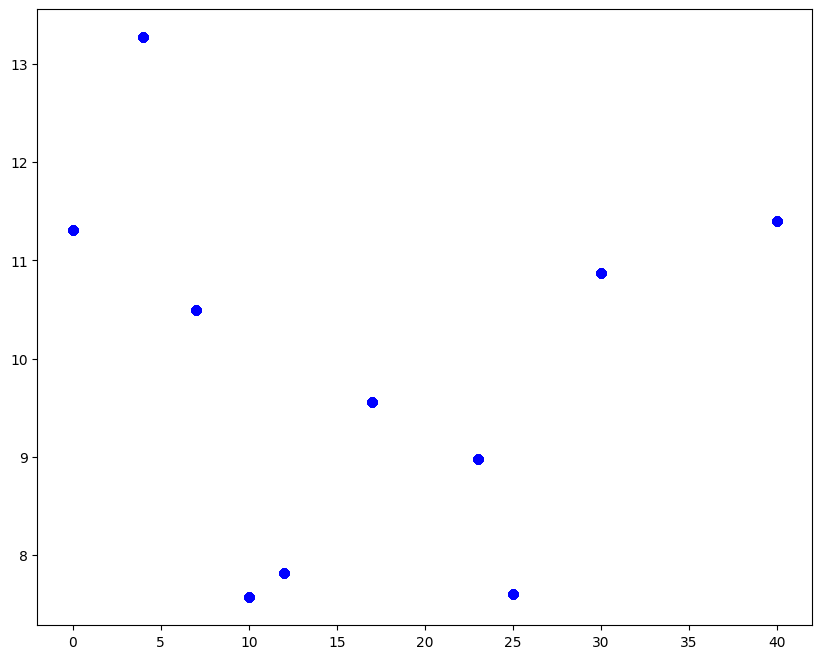

In [90]:
plt.plot(dist, temp_min, 'bo')

Iz gornjeg grafa vidimo da ona mjesta koja su jako blizu mora, imaju najvišu minimalnu temperaturu. Dakle, more ipak ima utjecaja na temperaturu u gradu ovisno o udaljenosti grada od mora.

Idemo vidjeti kako stojimo s ostalim meteorološkim veličinama. Krenimo s vlažnošću zraka.

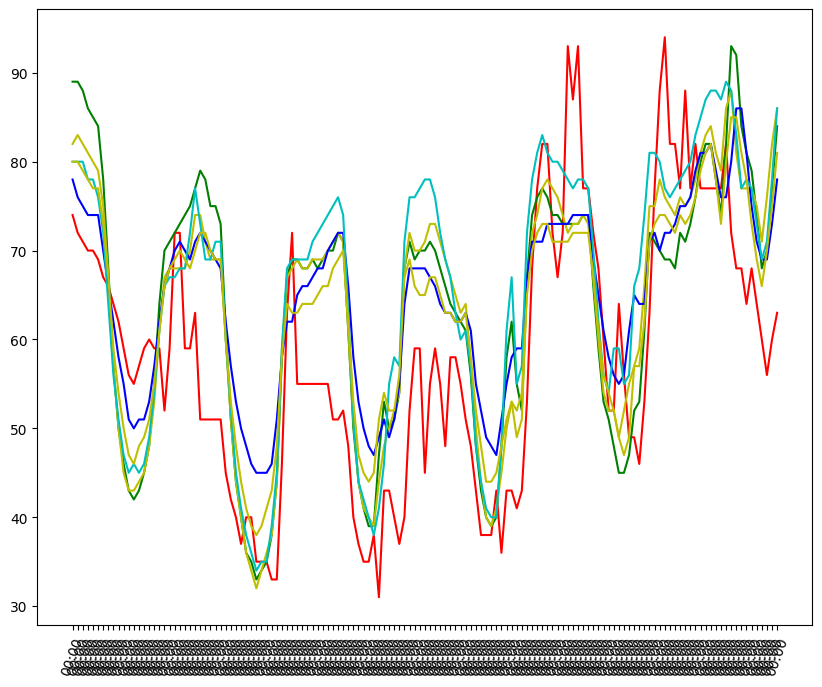

In [91]:
y1 = pula_df['humidity']
x1 = pula_df['date_time']
y2 = pazin_df['humidity']
x2 = pazin_df['date_time']
y3 = motovun_df['humidity']
x3 = motovun_df['date_time']
y4 = labin_df['humidity']
x4 = labin_df['date_time']
y5 = buzet_df['humidity']
x5 = buzet_df['date_time']
y6 = kanfanar_df['humidity']
x6 = kanfanar_df['date_time']


fig, ax = plt.subplots()

plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1, y1, 'r', x2, y2, 'g', x3, y3, 'y')
plt.plot(x4, y4, 'b', x5, y5, 'c', x6, y6, 'y')

Vlažnost zraka ovisi o od grada do grada. Možemo zaključiti da je to vezano uz udaljenost od mora, ali na vlažnost mogu utjecati i drugi parametri iz okoline.

In [92]:
humidity_max = [
    pula_df['humidity'].max(),
    pazin_df['humidity'].max(),
    motovun_df['humidity'].max(),
    labin_df['humidity'].max(),
    buzet_df['humidity'].max(),
    buje_df['humidity'].max(),
    visnjan_df['humidity'].max(),
    kanfanar_df['humidity'].max(),
    zminj_df['humidity'].max(),
    vodnjan_df['humidity'].max()
]
plt.plot(dist, humidity_max, 'bo')

Najviša vlažnost je nešto veća u gradovima koji su udaljeniji od mora, ali razlika nije velika.

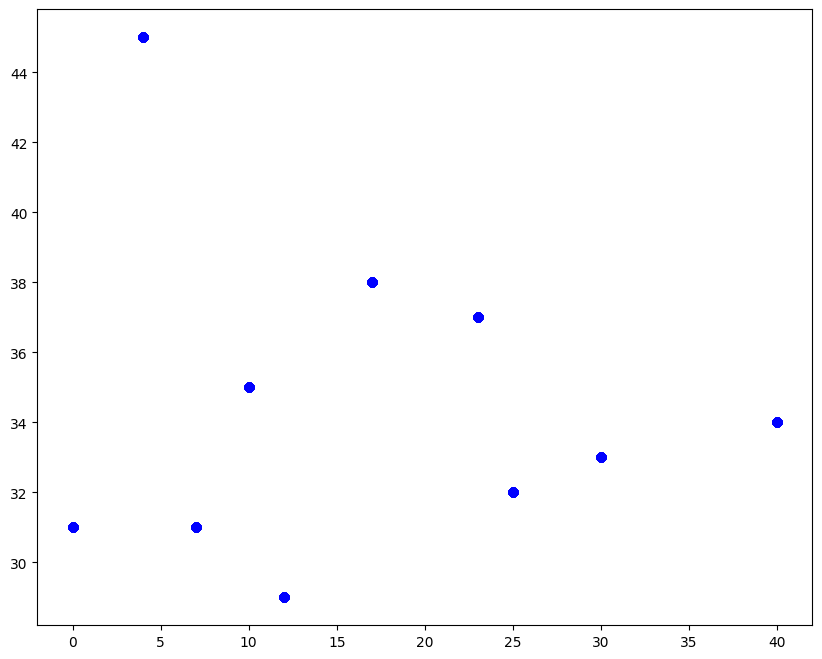

In [94]:
humidity_min = [
    pula_df['humidity'].min(),
    pazin_df['humidity'].min(),
    motovun_df['humidity'].min(),
    labin_df['humidity'].min(),
    buzet_df['humidity'].min(),
    buje_df['humidity'].min(),
    visnjan_df['humidity'].min(),
    kanfanar_df['humidity'].min(),
    zminj_df['humidity'].min(),
    vodnjan_df['humidity'].min()
]
plt.plot(dist, humidity_min, 'bo')

Minimalna vlažnost zraka je izraženija s povećanjem udaljenosti od mora. Ovo je također očekivano, jer hladniji zrak ima manju vlažnost, a vidjeli smo da je i temperatura manja s većom udaljenošću od mora.


#### Ruža vjetrova

Od podataka koje smo dobili zanimljivi su nam i vjetrovi. Dobili smo podatke o smjeru *wind_deg* i brzini *wind_speed* vjetra.

Prikažimo podatke za Pulu

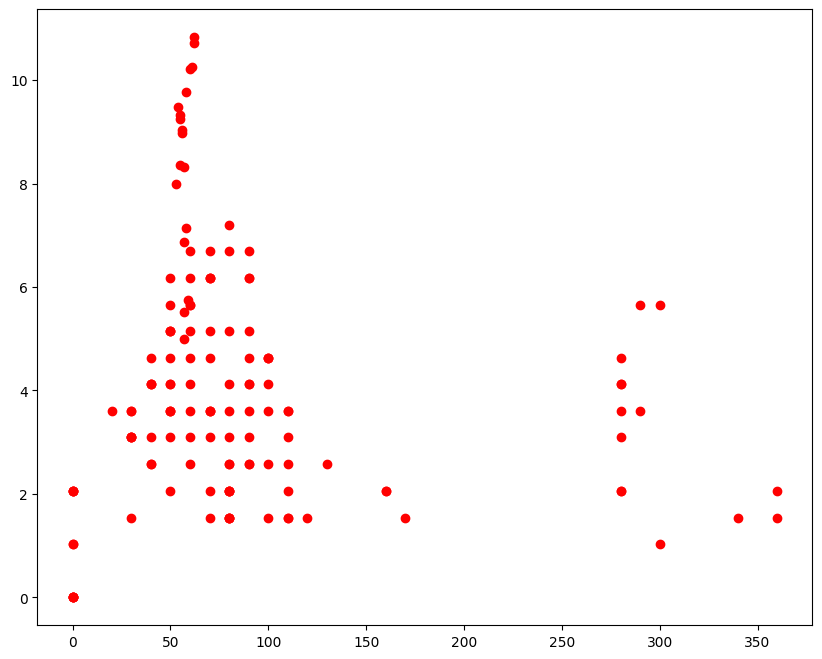

In [97]:
plt.plot(pula_df['wind_deg'], pula_df['wind_speed'], 'ro')

Ovakav tip grafa nije najbolji, ali ružu vjetrova ćemo najbolje prikazati kružnim histogram grafom.

In [98]:
hist, bins = np.histogram(pula_df['wind_deg'], 8, [0, 360])
print(hist)
print(bins)

[26 69 27  3  0  0 11  3]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


Prvo smo pripremili vrijednosti za histogram graf i onda ćemo prikaz ubaciti u jednu funkciju pomoću koje ćemo prikazivati dobivene vrijednosti.

In [121]:
def display_wind_rose(hist_values, city_name, max_values):
    N = 8
    theta = np.arange(0. , 2 * np.pi, 2 * np.pi / N)
    rad = np.array(hist_values)
    
    plt.figure(figsize=(10, 8))
    plt.axes([0.25, 0.24, 0.95, 0.95], polar=True)
    colors = [(1 - x/max_values, 1 - x/max_values, 0.75) for x in rad]
    plt.bar((theta + (np.pi/N)), rad, width=((2 * np.pi)/N), bottom=0.0, color=colors)
    plt.title(city_name, x=0.2, fontsize=20)

Prikažimo histogram za svaki grad.

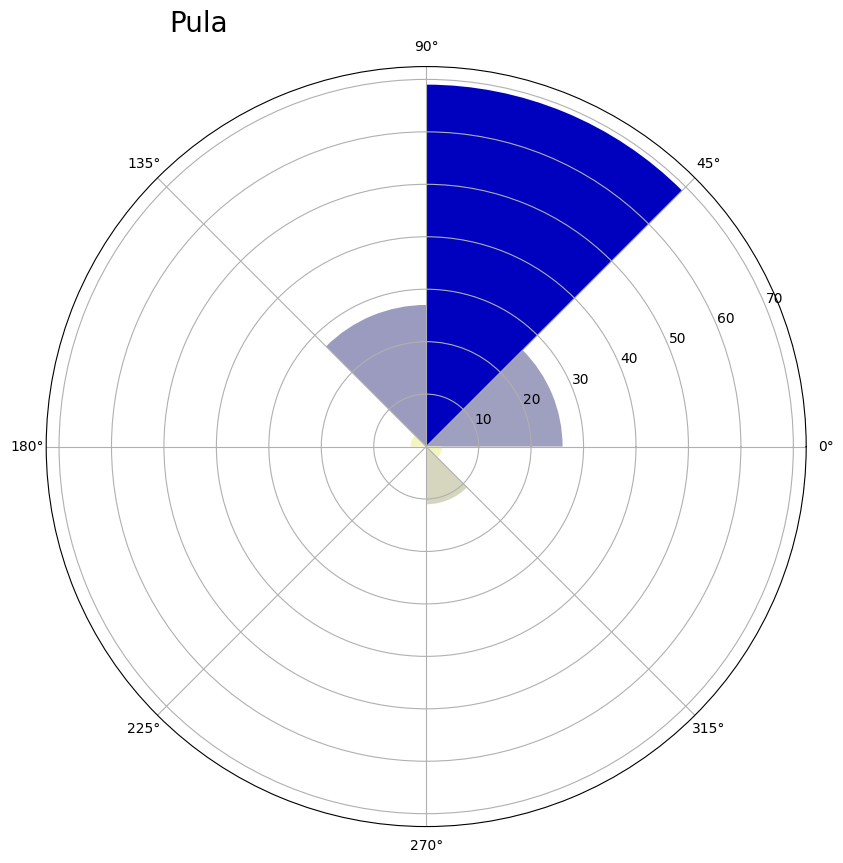

In [122]:
hist, bins = np.histogram(pula_df['wind_deg'], 8, [0, 360])
display_wind_rose(hist, 'Pula', max(hist))

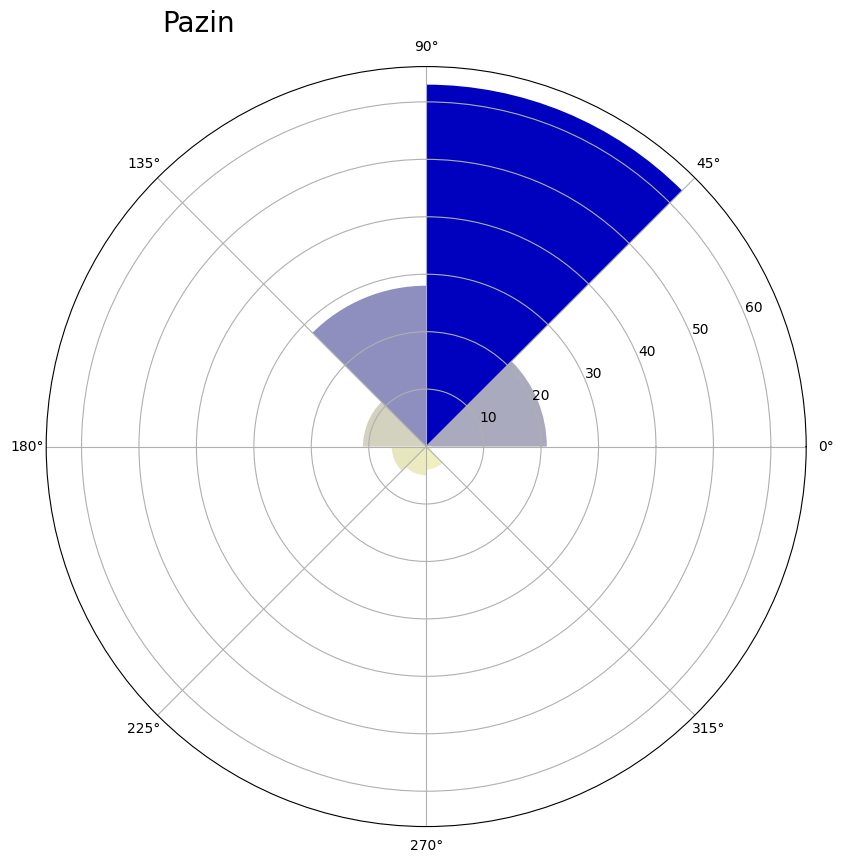

In [123]:
hist, bins = np.histogram(pazin_df['wind_deg'], 8, [0, 360])
display_wind_rose(hist, 'Pazin', max(hist))

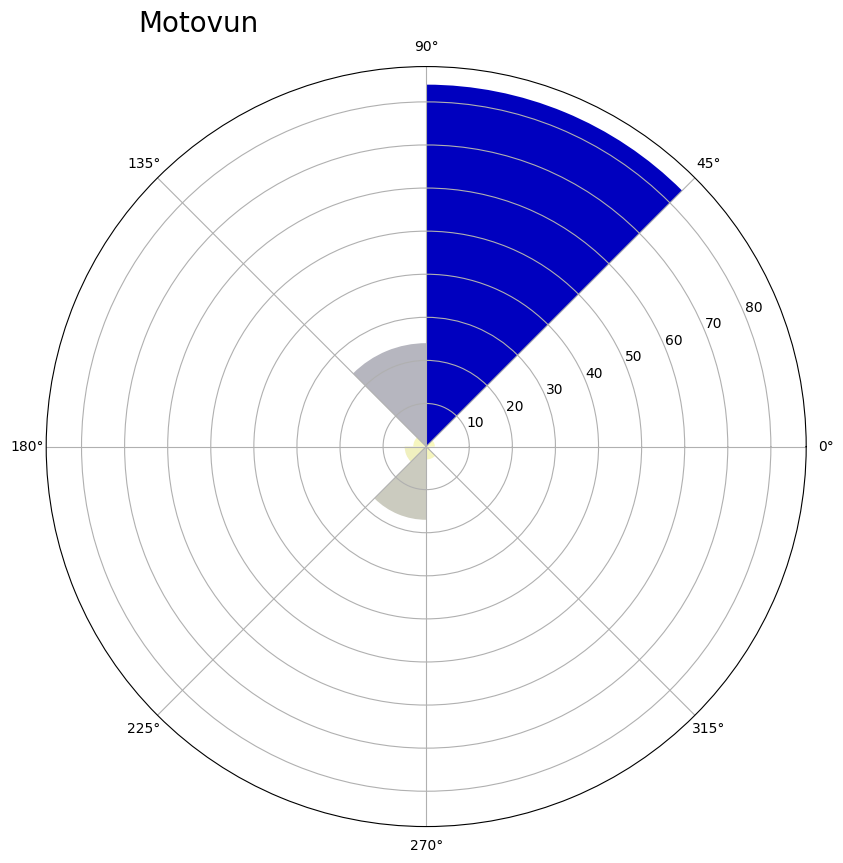

In [124]:
hist, bins = np.histogram(motovun_df['wind_deg'], 8, [0, 360])
display_wind_rose(hist, 'Motovun', max(hist))

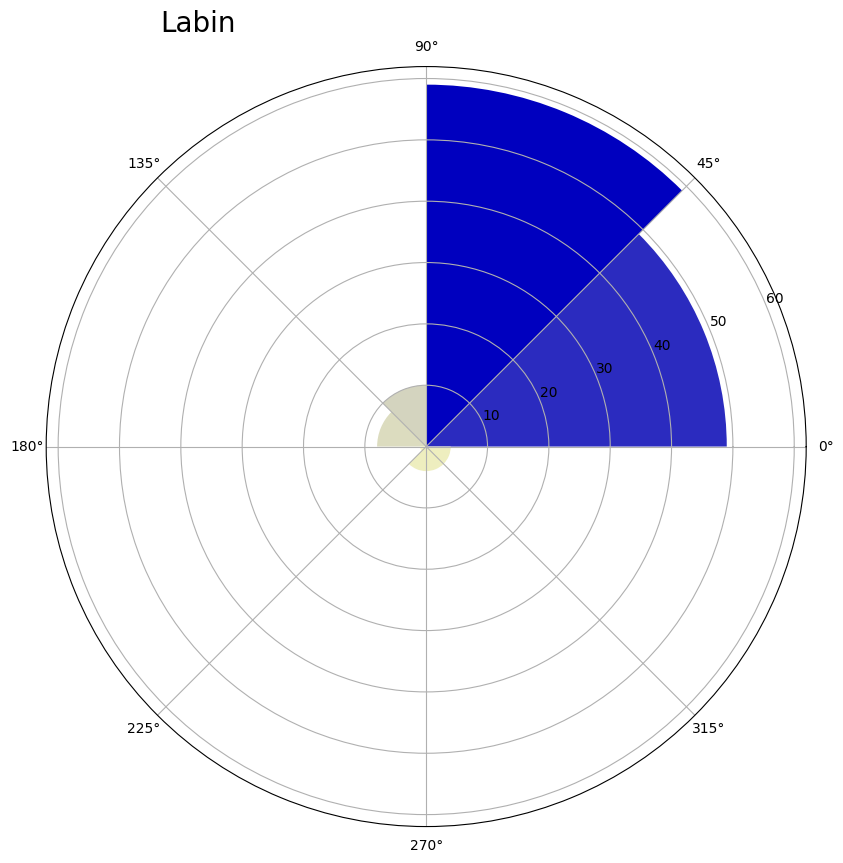

In [125]:
hist, bins = np.histogram(labin_df['wind_deg'], 8, [0, 360])
display_wind_rose(hist, 'Labin', max(hist))

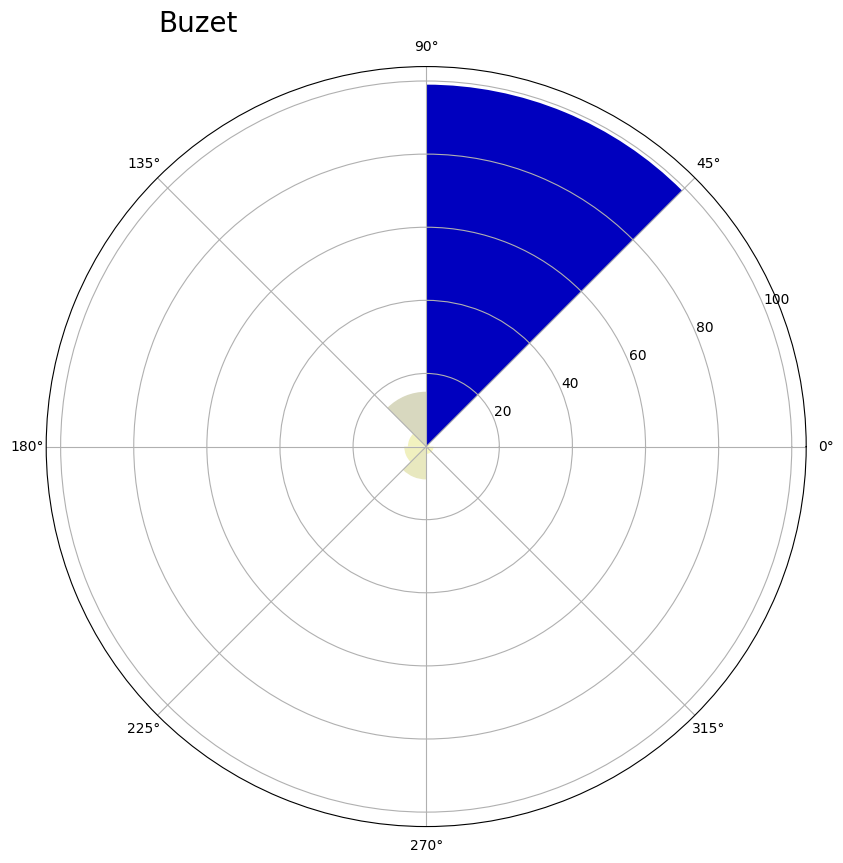

In [126]:
hist, bins = np.histogram(buzet_df['wind_deg'], 8, [0, 360])
display_wind_rose(hist, 'Buzet', max(hist))

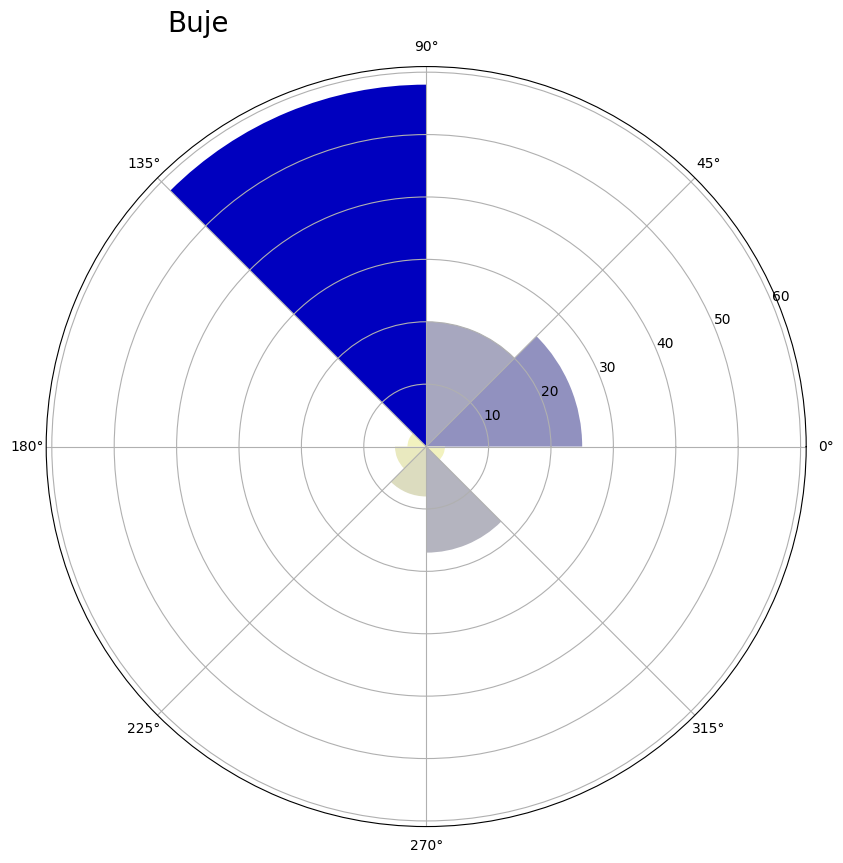

In [127]:
hist, bins = np.histogram(buje_df['wind_deg'], 8, [0, 360])
display_wind_rose(hist, 'Buje', max(hist))

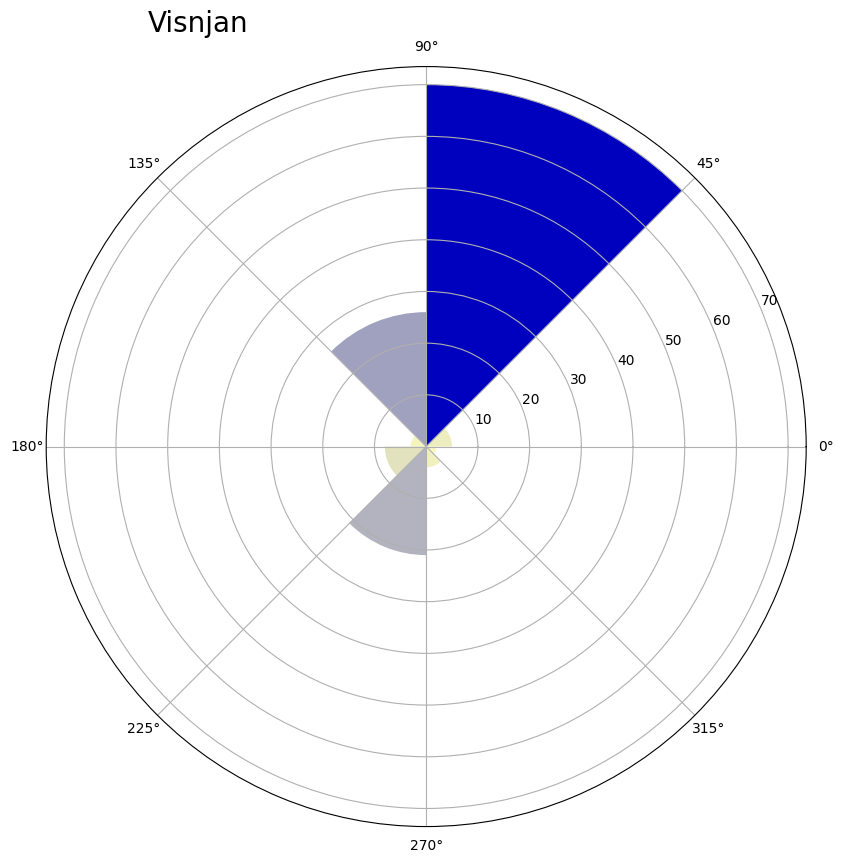

In [128]:
hist, bins = np.histogram(visnjan_df['wind_deg'], 8, [0, 360])
display_wind_rose(hist, 'Visnjan', max(hist))

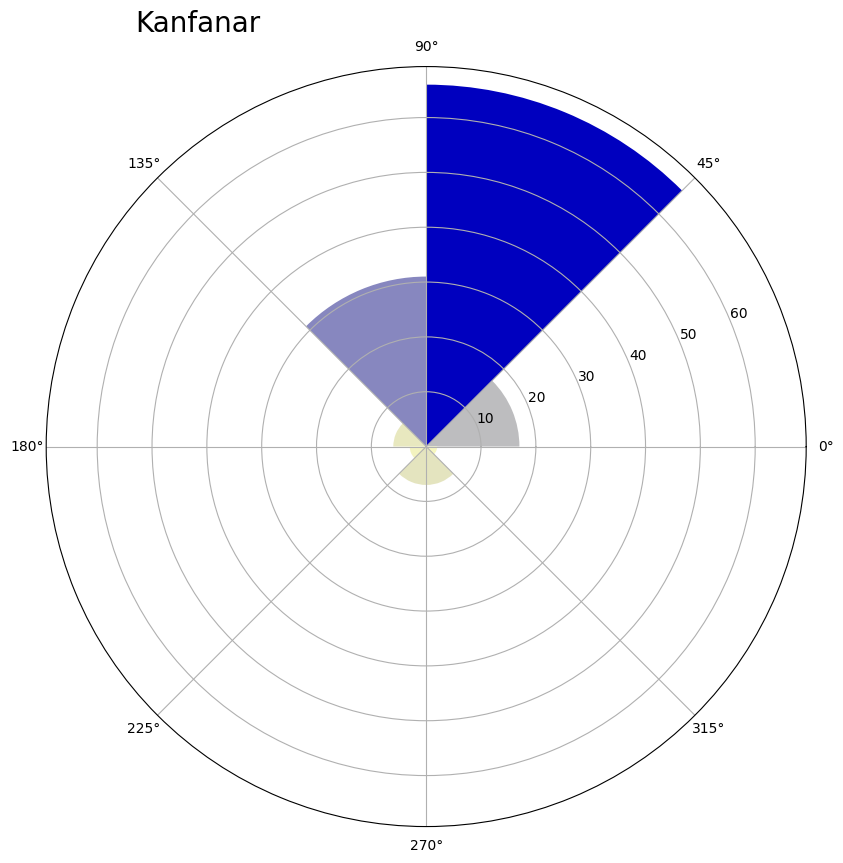

In [129]:
hist, bins = np.histogram(kanfanar_df['wind_deg'], 8, [0, 360])
display_wind_rose(hist, 'Kanfanar', max(hist))

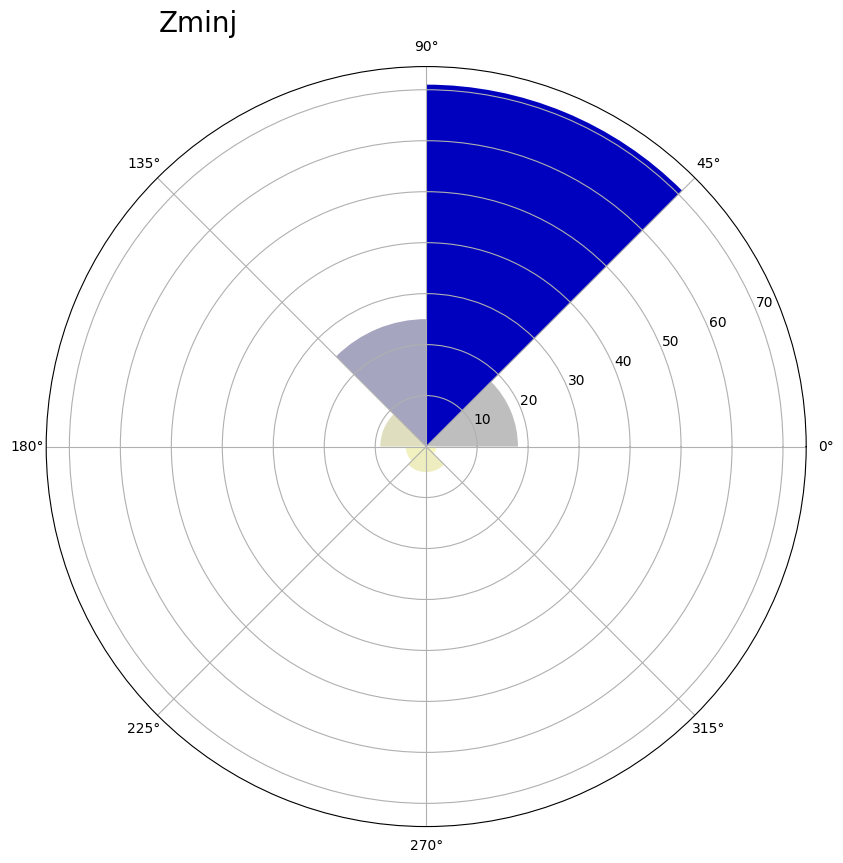

In [130]:
hist, bins = np.histogram(zminj_df['wind_deg'], 8, [0, 360])
display_wind_rose(hist, 'Zminj', max(hist))

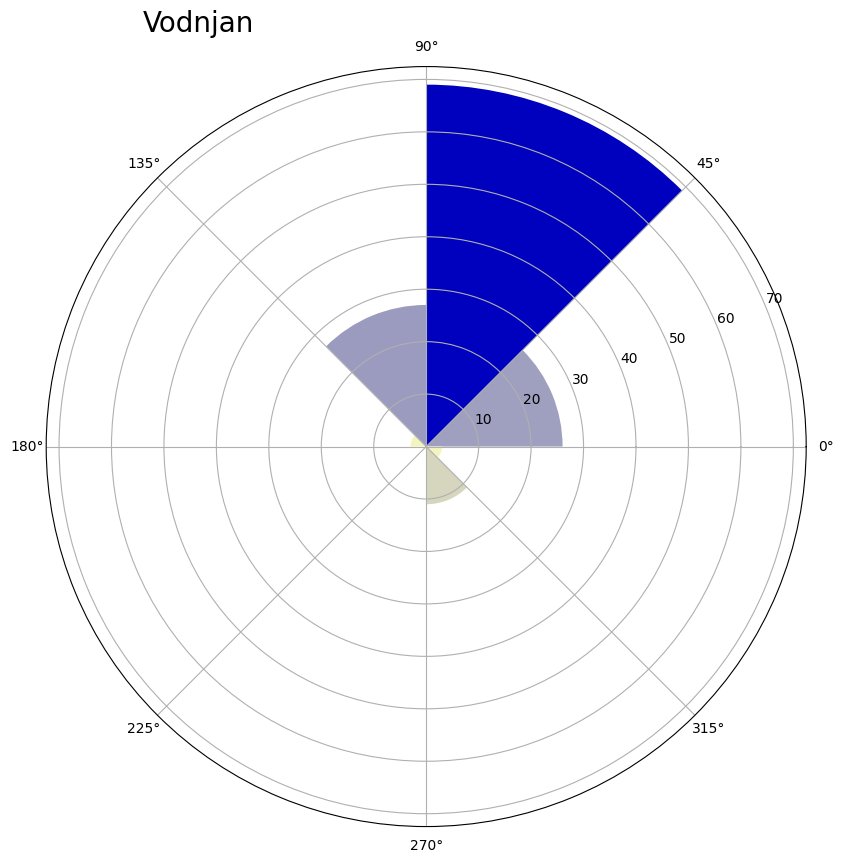

In [131]:
hist, bins = np.histogram(vodnjan_df['wind_deg'], 8, [0, 360])
display_wind_rose(hist, 'Vodnjan', max(hist))

Vidimo da u Istri, bez obzira na udaljenost od mora vjetrovi pušu gotovo uvijek iz istog smjera.

I na kraju možemo zaključiti da na neke meteorološke parametre udaljenost od mora ima utjecaja, a na druge nema.